<a href="https://colab.research.google.com/github/SafaaFathii/Numerical-Optimization-GD/blob/main/notebooks/Practical_Session_4_Adagrad_RMSProp_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
df = pd.DataFrame(columns=["X","Y"])
df["X"] = np.linspace(0,20)
df["Y"] = -1*df["X"]+2
#df = df.sample(frac = 1)
df

,X,Y
0,0.000000,2.000000
1,0.408163,1.591837
2,0.816327,1.183673
3,1.224490,0.775510
4,1.632653,0.367347
5,2.040816,-0.040816
6,2.448980,-0.448980
7,2.857143,-0.857143
8,3.265306,-1.265306
9,3.673469,-1.673469


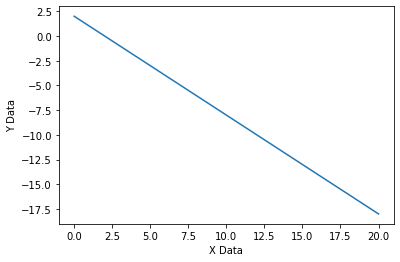

In [ ]:
plt.plot(df["X"],df["Y"])
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

#### Plot your data points. 

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [ ]:
eps = 1e-8
alpha = 0.1
theta_0 = 0
theta_1 =0
vt0 = 0
vt1 = 0


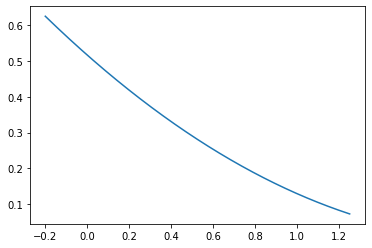

In [ ]:
Cost_List = []
theta_0_List = []
for i in range(1000):
    theta_0_List.append(theta_0)
    df["YPredict"] = theta_0 + theta_1 * df["X"]
    sumii = sum(np.power(df["YPredict"]-df["Y"] , 2))
    totalCost = sumii/(2*df.shape[0])
    Cost_List.append(totalCost)    
    G_Theta_0 = sum(df["YPredict"]-df["Y"])/df.shape[0]
    G_Theta_1 = sum((df["YPredict"] - df["Y"])*df["X"])/df.shape[0]
    vt0 += (G_Theta_0)**2
    vt1 += (G_Theta_1)**2
    theta_0 -= (alpha * G_Theta_0)/(math.sqrt(vt0)+eps)
    theta_1 -= (alpha * G_Theta_1)/(math.sqrt(vt1)+eps)
plt.plot(theta_0_List,Cost_List)
plt.show()


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df["Y"], df["YPredict"]))

0.9958222978287462


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

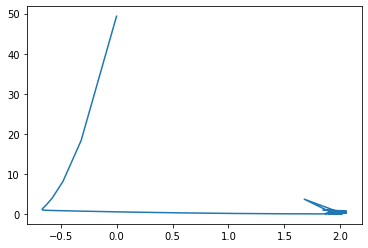

In [ ]:
eps = 1e-8
alpha = 0.1
theta_0 = 0
theta_1 =0
vt0 = 0
vt1 = 0
gamma = 0.9
Cost_List = []
theta_0_List = []
for i in range(1000):
    theta_0_List.append(theta_0)
    df["YPredict"] = theta_0 + theta_1 * df["X"]
    sumii = sum(np.power(df["YPredict"]-df["Y"] , 2))
    totalCost = sumii/(2*df.shape[0])
    Cost_List.append(totalCost)    
    G_Theta_0 = sum(df["YPredict"]-df["Y"])/df.shape[0]
    G_Theta_1 = sum((df["YPredict"] - df["Y"])*df["X"])/df.shape[0]
    vt0 = (gamma * vt0) +(1-gamma)*(G_Theta_0**2)
    vt1 = (gamma * vt1) +(1-gamma)*(G_Theta_1**2)
    theta_0 -= (alpha * G_Theta_0)/(math.sqrt(vt0)+eps)
    theta_1 -= (alpha * G_Theta_1)/(math.sqrt(vt1)+eps)
plt.plot(theta_0_List,Cost_List)
plt.show()


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df["Y"], df["YPredict"]))

0.9887808824105883


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

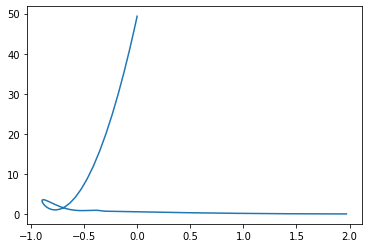

In [ ]:
eps = 1e-8
alpha = 0.01
theta_0 = 0
theta_1 =0
vt0 = 0
vt1 = 0
gamma1 = 0.9
gamma2 = 0.999
mt0 = 0
mt1 = 0
Cost_List = []
theta_0_List = []
for i in range(1000):
    theta_0_List.append(theta_0)
    df["YPredict"] = theta_0 + theta_1 * df["X"]
    sumii = sum(np.power(df["YPredict"]-df["Y"] , 2))
    totalCost = sumii/(2*df.shape[0])
    Cost_List.append(totalCost)    
    G_Theta_0 = sum(df["YPredict"]-df["Y"])/df.shape[0]
    G_Theta_1 = sum((df["YPredict"] - df["Y"])*df["X"])/df.shape[0]
    mt0 = (gamma1 * mt0) + (1 - gamma1)*(G_Theta_0)
    mt1 = (gamma1 * mt1) + (1 - gamma1)*(G_Theta_1)
    vt0 = (gamma2 * vt0) +(1-gamma2)*(G_Theta_0**2)
    vt1 = (gamma2 * vt1) +(1-gamma2)*(G_Theta_1**2)
    theta_0 -= (alpha * mt0)/(math.sqrt(vt0)+eps)
    theta_1 -= (alpha * mt1)/(math.sqrt(vt1)+eps)
plt.plot(theta_0_List,Cost_List)
plt.show()


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df["Y"], df["YPredict"]))

0.9999933469730578


## Congratulations 